In [1]:
!pip install pyramid-arima
!pip install pmdarima
from f_global import *
from data_clean import *
from visualisation import *
from arima import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/thor/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-_p5na9qn/pyramid-arima_5d0cb08aaa37430c939b2de040270831/setup.py'"'"'; __file__='"'"'/private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-_p5na9qn/pyramid-arima_5d0cb08aaa37430c939b2de040270831/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-wheel-ezdgkfvu
       cwd: /private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-_p5na9qn/pyramid-arima_5d0cb08aaa37430c939b2de040270831/
  Complete output (291 lines):
  Partial import of pyramid during the build process.
  Requirements: ['Cytho

Failed to build pyramid-arima
    Running setup.py install for pyramid-arima ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/thor/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-_p5na9qn/pyramid-arima_5d0cb08aaa37430c939b2de040270831/setup.py'"'"'; __file__='"'"'/private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-install-_p5na9qn/pyramid-arima_5d0cb08aaa37430c939b2de040270831/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc0000gp/T/pip-record-gx10hif4/install-record.txt --single-version-externally-managed --compile --install-headers /Users/thor/opt/anaconda3/include/python3.8/pyramid-arima
         cwd: /private/var/folders/ww/f8_yp6ds7ylb0jkxsxj285vc

You should consider upgrading via the '/Users/thor/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/thor/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
df = fillna(read_copy_csv('data/ETH-USD.csv', True, 'Date'))

In [6]:
df_info(df)


        Longueur du dataset : 1979 enregistrements
        Nombre de colonnes : 6
        


,type,Echantillon,% de valeurs nulles,Nbr L dupliquées,Nbr V unique
Open,float64,"[2.40645, 2.54298, 2.50772, 2.44315, 2.31969]",0.0,4,1974
High,float64,"[2.68467, 2.60677, 2.6118099999999997, 2.53097...",0.0,4,1975
Low,float64,"[2.34203, 2.3039, 2.39892, 2.18635, 2.11631]",0.0,4,1974
Close,float64,"[2.5264900000000003, 2.49496, 2.44506, 2.30604...",0.0,4,1973
Adj Close,float64,"[2.5264900000000003, 2.49496, 2.44506, 2.30604...",0.0,4,1973
Volume,float64,"[4903850.0, 6662340.0, 3725080.0, 5847500.0, 3...",0.0,4,1975


In [7]:
df[df.duplicated() == True]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-18,171.618073,187.940475,171.618073,186.914001,186.914001,2.016032e+10
2020-10-10,365.402466,378.267151,365.354034,370.967590,370.967590,1.361848e+10
2020-10-13,381.971466,387.296173,374.175018,379.484039,379.484039,1.391885e+10
2020-10-14,381.971466,387.296173,374.175018,379.484039,379.484039,1.391885e+10


In [8]:
df = df.drop(columns=['High','Low','Close','Adj Close', 'Volume'])

In [10]:
df

,Open
Date,
2016-01-28,2.406450
2016-01-29,2.542980
2016-01-30,2.507720
2016-01-31,2.443150
2016-02-01,2.319690
2016-02-02,2.215190
2016-02-03,2.431930
2016-02-04,2.529030
2016-02-05,2.570350


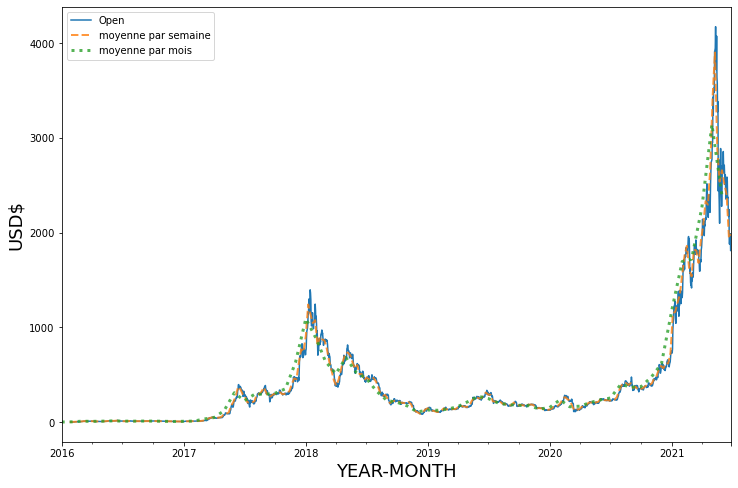

In [11]:
plot(df, '2016', '2021', 'Open', 'USD$')

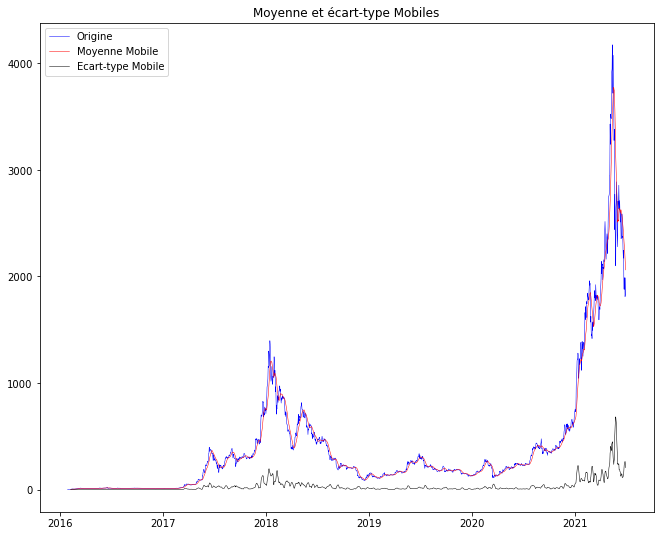

Statistiques ADF : -0.3494940749303154
p-value : 0.918196094042099
Valeurs Critiques :
	1%: -3.433704467332038
	5%: -2.8630218030562116
	10%: -2.5675588519656176


In [12]:
if_stationarity(df)

In [13]:
df_log = np.log(df)

In [14]:
y, train, test = train_test(df_log, 0.80)

Train : (1583, 1), Test : (396, 1)


In [15]:
auto_arima(train)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4395.344, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4399.159, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4397.352, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4397.337, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4397.684, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.221 seconds
-4399.159200266446


In [16]:
model_fit = fit_summary(ARIMA, train, (0, 1, 0), 'D')

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1582
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2201.580
Method:                           css   S.D. of innovations              0.060
Date:                Mon, 28 Jun 2021   AIC                          -4399.159
Time:                        11:26:41   BIC                          -4388.426
Sample:                    01-29-2016   HQIC                         -4395.171
                         - 05-28-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.002      1.865      0.062      -0.000       0.006


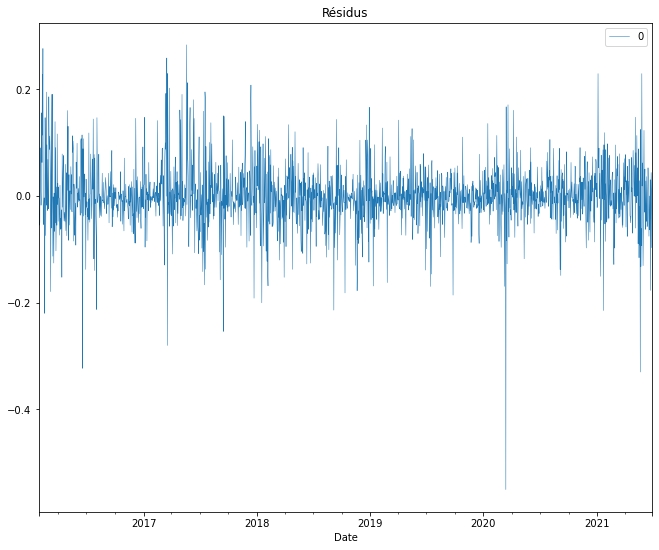

In [25]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot().set_title('Résidus');

In [18]:
pred = predict(model_fit, '2016-05-21', '2021-06-01', 'ARIMA Predictions')

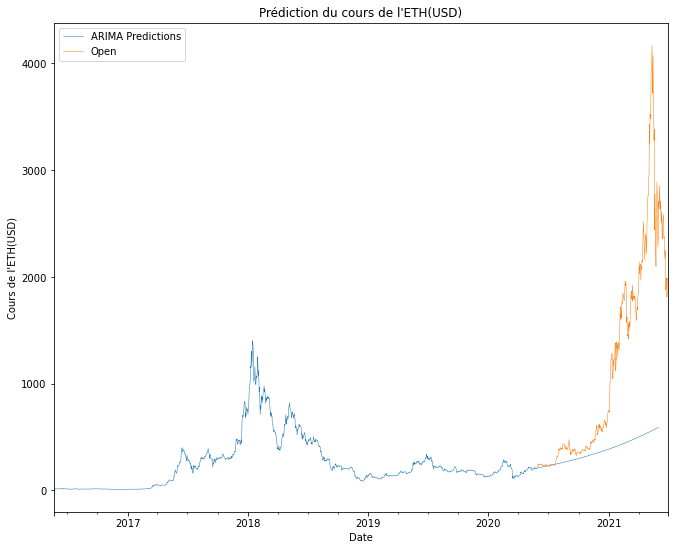

In [19]:
vis_predict(pred, test, 'Open')

In [20]:
auto_arima(df_log)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5578.309, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5574.635, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5572.707, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5572.700, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5570.110, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5576.714, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5576.740, Time=1.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5576.055, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5576.224, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5574.688, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5577.440, Time=0.57 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.705 seconds
-5578.3086261478265


In [21]:
model_fit = fit_summary(ARIMA, df_log, (0, 1, 0), 'D')

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1978
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2789.318
Method:                           css   S.D. of innovations              0.059
Date:                Mon, 28 Jun 2021   AIC                          -5574.635
Time:                        11:26:49   BIC                          -5563.456
Sample:                    01-29-2016   HQIC                         -5570.528
                         - 06-28-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.001      2.557      0.011       0.001       0.006


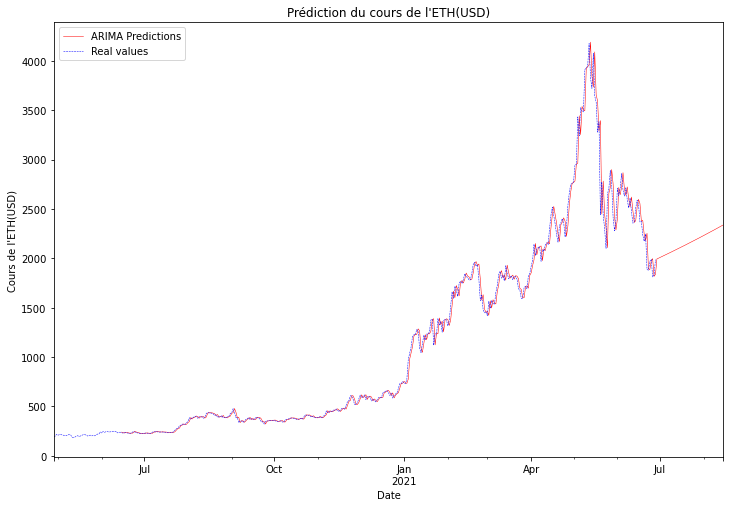

In [22]:
predict_tomorrow_ETH_price(model_fit, df_log)

In [23]:
predict_date('2021-06-28','2021-06-29', model_fit)

Les prédictions du cours de l'ETH pour le 2021-06-29 est de 1993.0500524276374 dollars
